In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

In [12]:
# Carga de datasets
df_abril = pd.read_csv('uber-raw-data-apr14.csv')
df_mayo = pd.read_csv('uber-raw-data-may14.csv')
df_junio = pd.read_csv('uber-raw-data-jun14.csv')
df_julio = pd.read_csv('uber-raw-data-jul14.csv')
df_agosto = pd.read_csv('uber-raw-data-aug14.csv')
df_septiembre = pd.read_csv('uber-raw-data-sep14.csv')

print(df_abril.head(3))
print(df_mayo.head(3))
print(df_junio.head(3))
print(df_julio.head(3))
print(df_agosto.head(3))
print(df_septiembre.head(3))

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
          Date/Time      Lat      Lon    Base
0  5/1/2014 0:02:00  40.7521 -73.9914  B02512
1  5/1/2014 0:06:00  40.6965 -73.9715  B02512
2  5/1/2014 0:15:00  40.7464 -73.9838  B02512
          Date/Time      Lat      Lon    Base
0  6/1/2014 0:00:00  40.7293 -73.9920  B02512
1  6/1/2014 0:01:00  40.7131 -74.0097  B02512
2  6/1/2014 0:04:00  40.3461 -74.6610  B02512
          Date/Time      Lat      Lon    Base
0  7/1/2014 0:03:00  40.7586 -73.9706  B02512
1  7/1/2014 0:05:00  40.7605 -73.9994  B02512
2  7/1/2014 0:06:00  40.7320 -73.9999  B02512
          Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0

In [13]:
#print(df_abril.info())
#print(df_mayo.info())
#print(df_junio.info())
#print(df_julio.info())
#print(df_agosto.info())
print(df_septiembre.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB
None


In [14]:
def mostrar_shapes(datasets):
    for nombre, df in datasets.items():
        print(f"{nombre}: {df.shape}")
        
datasets = {
    'abril': df_abril,
    'mayo': df_mayo,
    'junio': df_junio,
    'julio': df_julio,
    'agosto': df_agosto,
    'septiembre': df_septiembre
}

mostrar_shapes(datasets)


abril: (564516, 4)
mayo: (652435, 4)
junio: (663844, 4)
julio: (796121, 4)
agosto: (829275, 4)
septiembre: (1028136, 4)


Esto muestra que el mes en el que hubo un mayor número de viajes fue en **Septiembre**, y el que tuvo menor número fue **Abril**

## Actividad meses de **Abril** y **Junio**

<Figure size 1000x600 with 0 Axes>

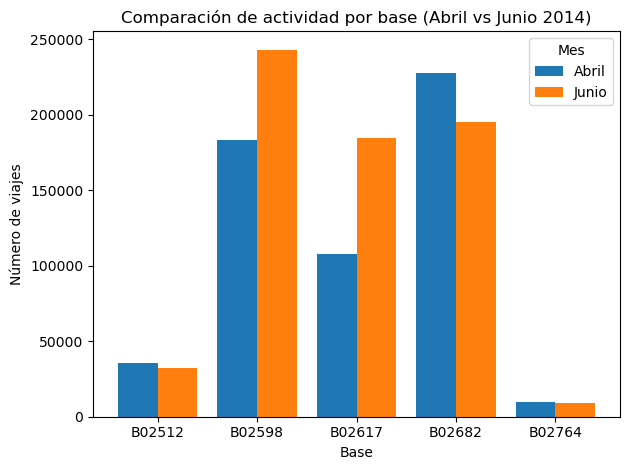

         Abril   Junio   Total
Base                          
B02512   35536   32509   68045
B02598  183263  242975  426238
B02617  108001  184460  292461
B02682  227808  194926  422734
B02764    9908    8974   18882


In [15]:
# Conteo de cada base por mes
bases_abril = df_abril['Base'].value_counts()
bases_junio = df_junio['Base'].value_counts()

# Unir a un solo DF para comparar
df_bases = pd.DataFrame({
    'Abril': bases_abril,
    'Junio': bases_junio
})

# Gráfica comparativa
plt.figure(figsize=(10, 6))
df_bases.plot(kind='bar', width=0.8)
plt.title('Comparación de actividad por base (Abril vs Junio 2014)')
plt.xlabel('Base')
plt.ylabel('Número de viajes')
plt.xticks(rotation=0)
plt.legend(title='Mes')
plt.tight_layout()
plt.show()


df_bases['Total'] = df_bases['Abril'] + df_bases['Junio']
print(df_bases)


## Actividad meses de **Septiembre** y **Agosto**

<Figure size 1000x600 with 0 Axes>

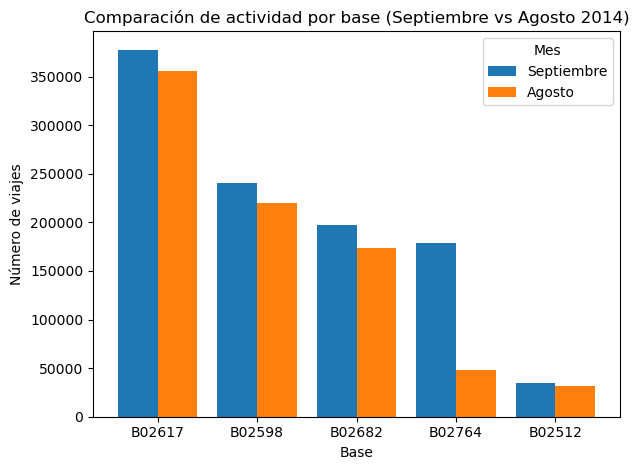

        Septiembre  Agosto   Total
Base                              
B02617      377695  355803  733498
B02598      240600  220129  460729
B02682      197138  173280  370418
B02764      178333   48591  226924
B02512       34370   31472   65842


In [16]:
# Conteo de cada base por mes
bases_septiembre = df_septiembre['Base'].value_counts()
bases_agosto = df_agosto['Base'].value_counts()

# Unir a un solo DF para comparar
df_bases = pd.DataFrame({
    'Septiembre': bases_septiembre,
    'Agosto': bases_agosto
})

# Gráfica comparativa
plt.figure(figsize=(10, 6))
df_bases.plot(kind='bar', width=0.8)
plt.title('Comparación de actividad por base (Septiembre vs Agosto 2014)')
plt.xlabel('Base')
plt.ylabel('Número de viajes')
plt.xticks(rotation=0)
plt.legend(title='Mes')
plt.tight_layout()
plt.show()


df_bases['Total'] = df_bases['Septiembre'] + df_bases['Agosto']
print(df_bases)

## Promedio de viajes por base

<Figure size 1200x800 with 0 Axes>

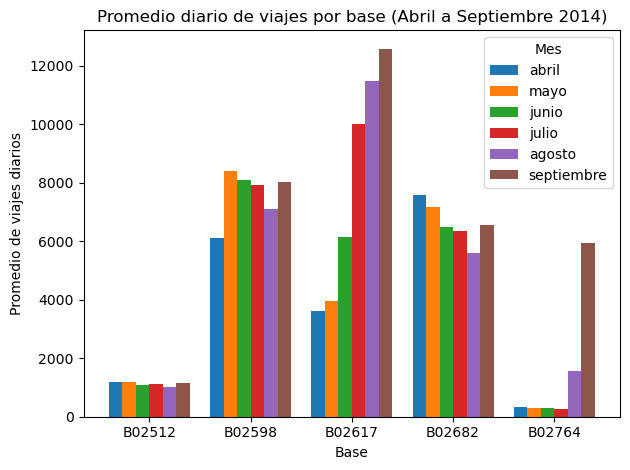

          abril     mayo    junio     julio    agosto  septiembre
Base                                                             
B02512  1184.53  1185.97  1083.63   1129.71   1015.23     1145.67
B02598  6108.77  8404.81  8099.17   7922.48   7100.94     8020.00
B02617  3600.03  3959.16  6148.67  10005.16  11477.52    12589.83
B02682  7593.60  7189.77  6497.53   6346.90   5589.68     6571.27
B02764   330.27   306.58   299.13    277.06   1567.45     5944.43


In [17]:
# Función para calcular el promedio diario por base
def promedio_viajes_por_base(df):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df['day'] = df['Date/Time'].dt.day
    viajes_por_dia = df.groupby(['Base', 'day']).size().reset_index(name='Viajes')
    promedio_por_base = viajes_por_dia.groupby('Base')['Viajes'].mean()
    
    return promedio_por_base

promedios_dict = {}

for mes, data in datasets.items():
    promedios_dict[mes] = promedio_viajes_por_base(data)

# print(promedios_dict)

# --- 4) Gráfica comparativa con todas las bases ---
plt.figure(figsize=(12, 8))
df_promedios = pd.DataFrame(promedios_dict)
df_promedios.plot(kind='bar', width=0.8)
plt.title('Promedio diario de viajes por base (Abril a Septiembre 2014)')
plt.xlabel('Base')
plt.ylabel('Promedio de viajes diarios')
plt.xticks(rotation=0)
plt.legend(title='Mes') 
plt.tight_layout()
plt.show()

df_promedios = pd.DataFrame(promedios_dict).fillna(0).round(2)
print(df_promedios)

## Horario del día en el que más y menos viajes hay

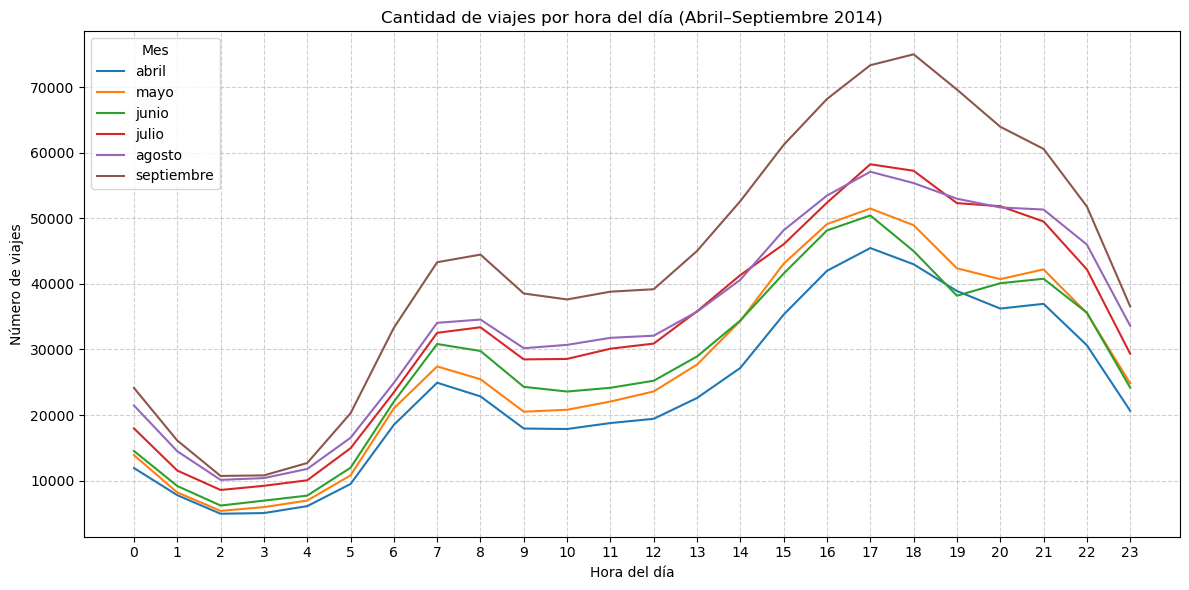

      abril   mayo  junio  julio  agosto  septiembre   Total
hour                                                        
0     11910  13875  14514  17953   21451       24133  103836
1      7769   8186   9167  11527   14471       16107   67227
2      4935   5372   6189   8562   10105       10702   45865
3      5040   5946   6937   9199   10376       10789   48287
4      6095   6945   7701  10040   11774       12675   55230
5      9476  10789  11955  14932   16525       20262   83939
6     18498  21015  22030  23456   24907       33307  143213
7     24924  27413  30834  32545   34064       43314  193094
8     22843  25460  29771  33387   34566       44477  190504
9     17939  20507  24298  28486   30195       38542  159967
10    17865  20801  23584  28558   30706       37634  159148
11    18774  22055  24155  30120   31778       38821  165703
12    19425  23595  25233  30900   32106       39193  170452
13    22603  27699  28937  35832   35764       45042  195877
14    27190  34363  3442

In [18]:
def viajes_por_hora(df):
    # 1️⃣ Convertir a datetime (para poder extraer la hora)
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    
    # 2️⃣ Extraer la hora (de 0 a 23)
    df['hour'] = df['Date/Time'].dt.hour
    
    # 3️⃣ Contar cuántos viajes hay por cada hora
    conteo = df['hour'].value_counts().sort_index()
    
    return conteo

viajes_por_hora_dict = {}

for mes, data in datasets.items():
    viajes_por_hora_dict[mes] = viajes_por_hora(data)

df_viajes_hora = pd.DataFrame(viajes_por_hora_dict).fillna(0).astype(int)
#print(df_viajes_hora)

plt.figure(figsize=(12,6))
for mes in df_viajes_hora.columns:
    plt.plot(df_viajes_hora.index, df_viajes_hora[mes], label=mes)

plt.title('Cantidad de viajes por hora del día (Abril–Septiembre 2014)')
plt.xlabel('Hora del día')
plt.ylabel('Número de viajes')
plt.xticks(range(0, 24))
plt.legend(title='Mes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

df_viajes_hora['Total'] = df_viajes_hora.sum(axis=1)

print(df_viajes_hora)

Resumen de viajes por día de la semana:
            Viajes  Porcentaje
Dia_Semana                    
Monday      541472       11.94
Tuesday     663789       14.64
Wednesday   696488       15.36
Thursday    755145       16.65
Friday      741139       16.35
Saturday    646114       14.25
Sunday      490180       10.81

Total de viajes: 4,534,327
Promedio por día: 647,761 viajes


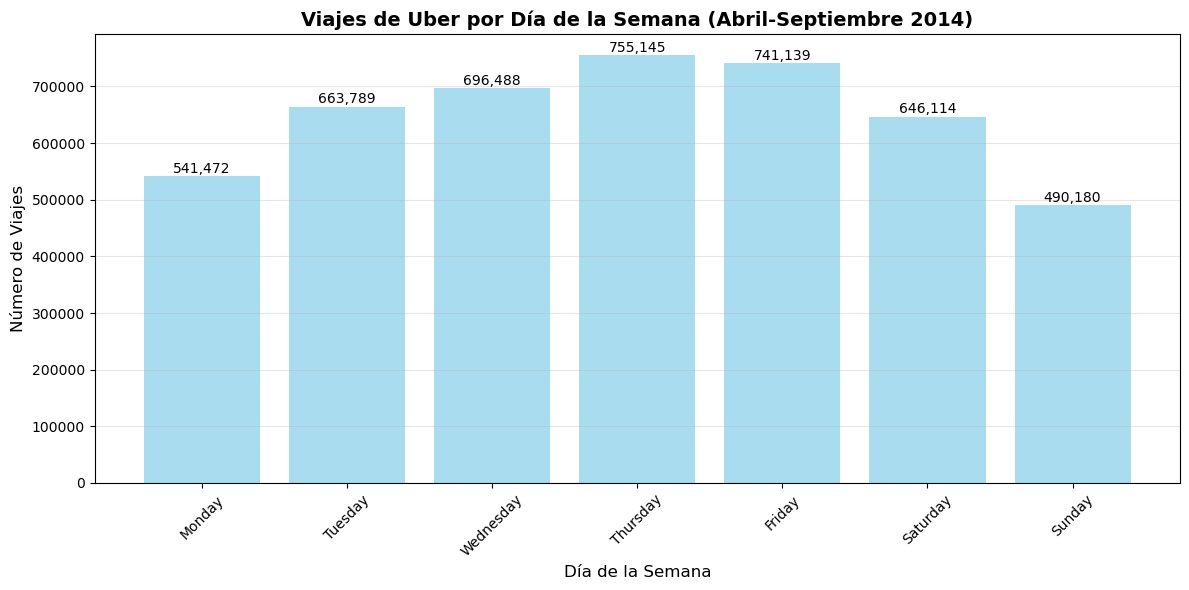

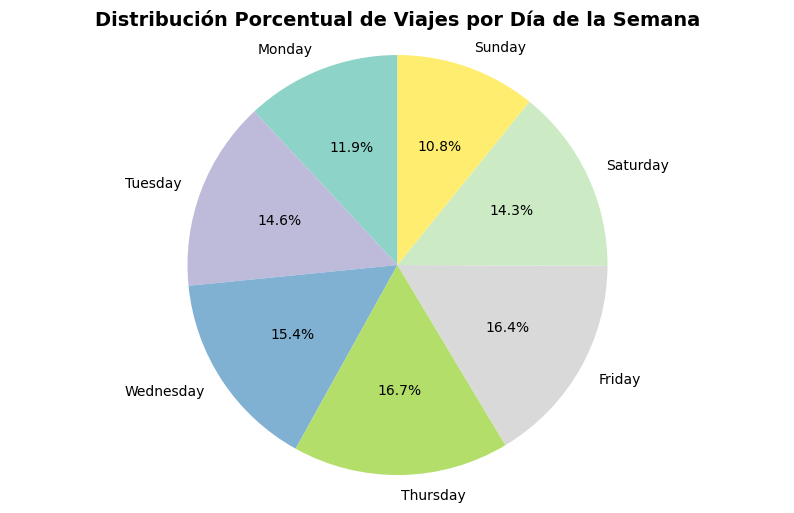

In [19]:
# Función para extraer el día de la semana (versión corregida)
def obtener_dia_semana(fecha):
    return fecha.strftime('%A')

# Aplicar a cada dataset
def agregar_dia_semana(df):
    # Convertir a datetime si no está ya en ese formato
    if not pd.api.types.is_datetime64_any_dtype(df['Date/Time']):
        df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M:%S')
    df['Dia_Semana'] = df['Date/Time'].apply(obtener_dia_semana)
    return df

# Aplicar a todos los datasets
df_abril = agregar_dia_semana(df_abril)
df_mayo = agregar_dia_semana(df_mayo)
df_junio = agregar_dia_semana(df_junio)
df_julio = agregar_dia_semana(df_julio)
df_agosto = agregar_dia_semana(df_agosto)
df_septiembre = agregar_dia_semana(df_septiembre)

# Combinar todos los datos en un solo DataFrame
df_completo = pd.concat([df_abril, df_mayo, df_junio, df_julio, df_agosto, df_septiembre], ignore_index=True)

# Contar viajes por día de la semana
viajes_por_dia = df_completo['Dia_Semana'].value_counts()

# Ordenar por día de la semana (lunes a domingo)
dias_orden = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
viajes_por_dia = viajes_por_dia.reindex(dias_orden)

# Calcular promedios
total_viajes = viajes_por_dia.sum()
promedio_por_dia = viajes_por_dia.mean()
viajes_porcentaje = (viajes_por_dia / total_viajes * 100).round(2)

# Crear DataFrame resumen
resumen_dias = pd.DataFrame({
    'Viajes': viajes_por_dia,
    'Porcentaje': viajes_porcentaje
})

print("Resumen de viajes por día de la semana:")
print(resumen_dias)
print(f"\nTotal de viajes: {total_viajes:,}")
print(f"Promedio por día: {promedio_por_dia:,.0f} viajes")

# Gráfico de viajes por día de la semana
plt.figure(figsize=(12, 6))
bars = plt.bar(resumen_dias.index, resumen_dias['Viajes'], color='skyblue', alpha=0.7)
plt.title('Viajes de Uber por Día de la Semana (Abril-Septiembre 2014)', fontsize=14, fontweight='bold')
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Viajes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Agregar valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
             f'{height:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Gráfico de porcentajes
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(resumen_dias)))
plt.pie(resumen_dias['Porcentaje'], labels=resumen_dias.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución Porcentual de Viajes por Día de la Semana', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()


C:\Users\migue\AppData\Local\Temp\ipykernel_20588\4052638768.py:34: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  .pivot_table(index="DayName", columns="Month", values="Date/Time", aggfunc="count")


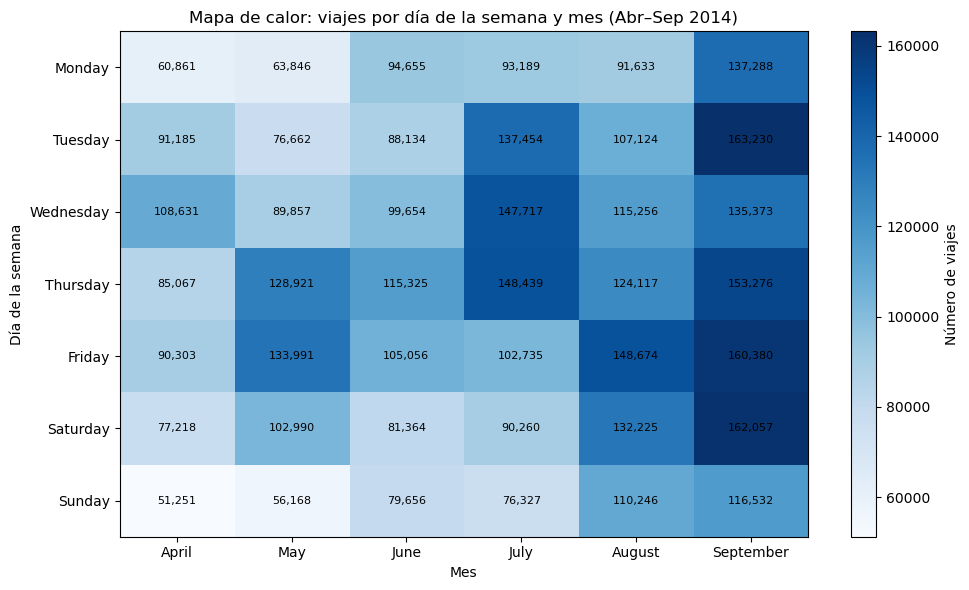

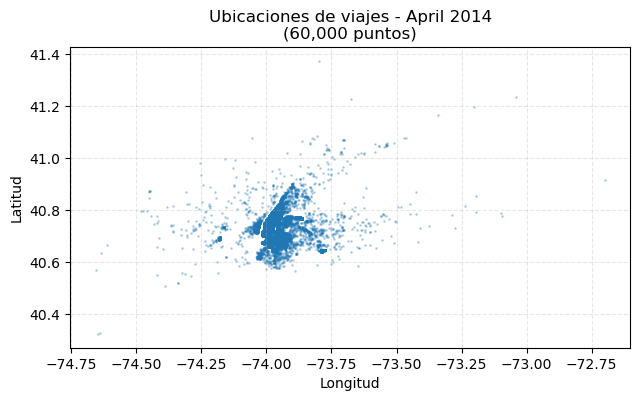

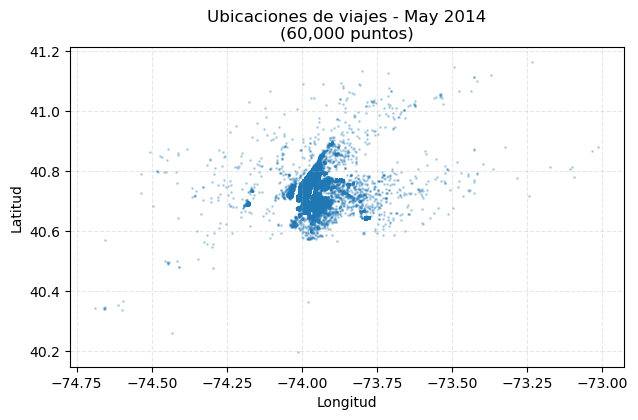

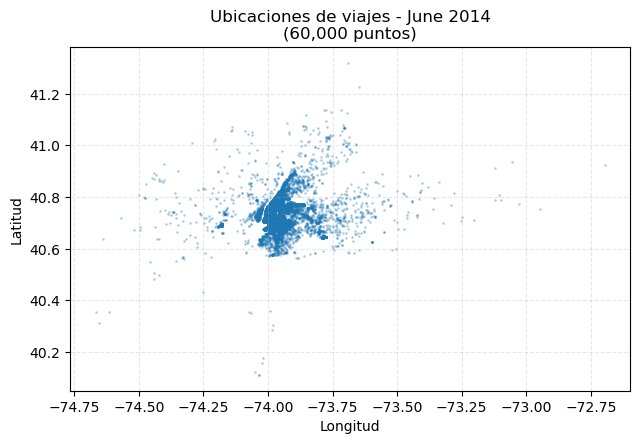

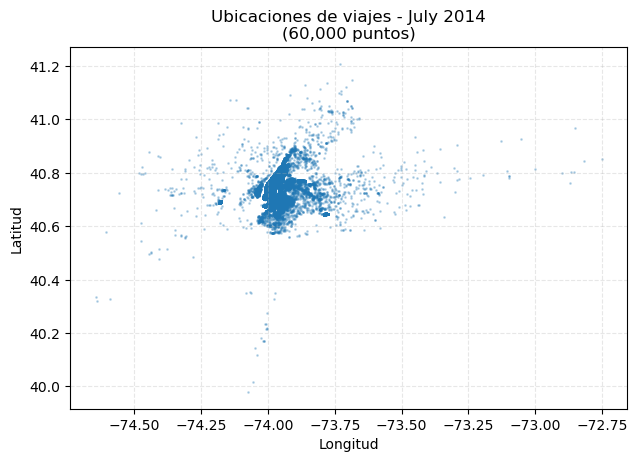

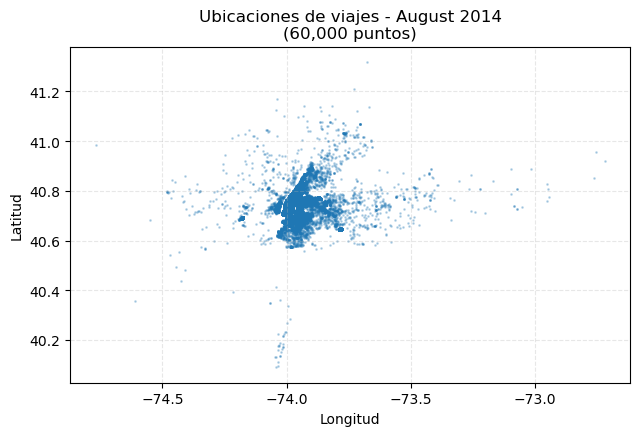

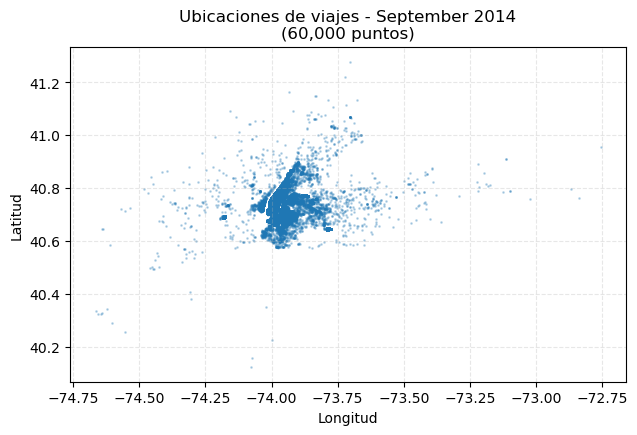

In [20]:
# ------------------------------------------------------------
# 2) Preparación de columnas comunes: Mes (nombre), Día de semana (en inglés como en tu orden)
# ------------------------------------------------------------
def preparar(df):
    # Forzamos formato original de los datasets (MM/DD/YYYY HH:MM:SS)
    df = df.copy()
    df["Date/Time"] = pd.to_datetime(df["Date/Time"], format="%m/%d/%Y %H:%M:%S")
    df["MonthNum"] = df["Date/Time"].dt.month
    df["Month"] = df["Date/Time"].dt.month_name()  # April, May, ...
    df["DayName"] = df["Date/Time"].dt.day_name()  # Monday ... Sunday
    return df

dfs = [
    preparar(df_abril),
    preparar(df_mayo),
    preparar(df_junio),
    preparar(df_julio),
    preparar(df_agosto),
    preparar(df_septiembre),
]

df_all = pd.concat(dfs, ignore_index=True)

# ------------------------------------------------------------
# 3) (Gráfica 1) Mapa de calor: Días de la semana vs Meses (en azul)
# ------------------------------------------------------------
# Orden personalizado (abril a septiembre y lunes a domingo)
meses_orden = ["April", "May", "June", "July", "August", "September"]
dias_orden = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

tabla = (
    df_all.assign(Month=pd.Categorical(df_all["Month"], categories=meses_orden, ordered=True),
                  DayName=pd.Categorical(df_all["DayName"], categories=dias_orden, ordered=True))
          .pivot_table(index="DayName", columns="Month", values="Date/Time", aggfunc="count")
          .reindex(index=dias_orden, columns=meses_orden)
          .fillna(0)
          .astype(int)
)

# Dibujar heatmap usando solo matplotlib (cmap azul)
plt.figure(figsize=(10, 6))
im = plt.imshow(tabla.values, aspect="auto", cmap="Blues")  # <- paleta azul solicitada
plt.colorbar(im, label="Número de viajes")
plt.xticks(ticks=np.arange(len(tabla.columns)), labels=tabla.columns, rotation=0)
plt.yticks(ticks=np.arange(len(tabla.index)), labels=tabla.index)
plt.title("Mapa de calor: viajes por día de la semana y mes (Abr–Sep 2014)")
plt.xlabel("Mes")
plt.ylabel("Día de la semana")

# Anotar los valores en cada celda
for i in range(tabla.shape[0]):
    for j in range(tabla.shape[1]):
        val = tabla.iat[i, j]
        plt.text(j, i, f"{val:,}", ha="center", va="center", fontsize=8)

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 4) (Gráfica 2) “Mapa” de coordenadas por mes (scatter Lat/Lon por mes)
#    - Un gráfico por mes, con alpha bajo para evitar saturación
#    - Si hay muchos puntos, tomar una muestra aleatoria (hasta 60k) para no colgar el render
# ------------------------------------------------------------
def scatter_por_mes(df_mes, mes, max_puntos=60000):
    dfp = df_mes[["Lat", "Lon"]].dropna()
    n = len(dfp)
    if n > max_puntos:
        dfp = dfp.sample(max_puntos, random_state=42)
    
    plt.figure(figsize=(6.5, 7))
    plt.scatter(dfp["Lon"], dfp["Lat"], s=1, alpha=0.25)
    plt.title(f"Ubicaciones de viajes - {mes} 2014\n({len(dfp):,} puntos)")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True, linestyle="--", alpha=0.3)
    # Fijar un aspecto similar para que no se deforme el “mapa”
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

for mes in meses_orden:
    scatter_por_mes(df_all[df_all["Month"] == mes], mes)